# IMDB dataset


In [35]:
import random as rand

import datasets as ds
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import transformers

rand.seed(42)

In [8]:
imdb = ds.load_dataset("imdb")

print(imdb)

Found cached dataset imdb (/home/dburian/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1)


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})


In [31]:
train = imdb["train"]

train_df = pd.DataFrame(train)
train_df["text_wc"] = train_df["text"].apply(lambda text: len(text.split(" ")))

tokenizer = transformers.AutoTokenizer.from_pretrained("roberta-base")
train_df["text_tc"] = train_df["text"].apply(lambda text: len(tokenizer.tokenize(text)))


train_df.describe()

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (678 > 512). Running this sequence through the model will result in indexing errors


,label,text_wc,text_tc
count,25000.00000,25000.000000,25000.000000
mean,0.50000,233.776720,299.675560
std,0.50001,173.715418,225.155963
min,0.00000,10.000000,11.000000
25%,0.00000,127.000000,159.750000
50%,0.50000,174.000000,222.000000
75%,1.00000,284.000000,366.000000
max,1.00000,2470.000000,3097.000000


In [10]:
train_df.hist()

,label,text_wc
count,25000.00000,25000.000000
mean,0.50000,233.776720
std,0.50001,173.715418
min,0.00000,10.000000
25%,0.00000,127.000000
50%,0.50000,174.000000
75%,1.00000,284.000000
max,1.00000,2470.000000


In [57]:
for ex_ind in rand.choices(train_df.index, k=10):
    ex = train_df.iloc[ex_ind]
    print(f'label: {ex["label"]}, word count: {ex["text_wc"]}')
    print(ex["text"])
    print()

label: 1, word count: 141
When I saw this movie a few days ago, my eyes were completely fixed to the screen. Its greatness held my attention to such an extent that I focused all of my attention on it for its entire duration. I would recommend seeing it not just to fans of anime, but to anyone who likes great movies period (or who likes really weird stuff). The style of art is beautiful, the sound is perfect, and the symbolism within it is breathtaking. I've heard complaints about the weird insertion of English text in the movie, but I think the way its done is complementary to the strange style of the movie. The self-attributed description of "Hello Kitty on acid" doesn't do justice to this film of absolutely epic proportions. I'd like to find more works by whoever made this, and see them.

label: 1, word count: 179
I recently purchased the complete American Gothic series on DVD and it lived up to my memories of it. I was very grateful to be able to view for the first time episodes tha

598.0


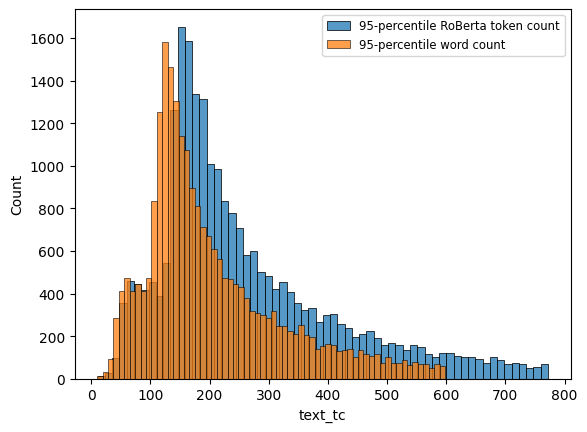

In [81]:
nintyfive_perc_wc = np.percentile(train_df["text_wc"].to_numpy(), 95)
nintyfive_perc_tc = np.percentile(train_df["text_tc"].to_numpy(), 95)
print(nintyfive_perc_wc)

fig, ax = plt.subplots()
sns.histplot(
    data=train_df[train_df["text_tc"] <= nintyfive_perc_tc],
    x="text_tc",
    ax=ax,
    label="95-percentile RoBerta token count",
)
sns.histplot(
    data=train_df[train_df["text_wc"] <= nintyfive_perc_wc],
    x="text_wc",
    ax=ax,
    label="95-percentile word count",
)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles[1::2], fontsize="small")

fig.savefig("imdb_dist.png")

In [78]:
perc_too_long = sum(train_df["text_tc"] >= 512) / len(train_df)

print(f"{perc_too_long*100:.2f}% of reviews are over 512 tokens.")

13.62% of reviews are over 512 tokens.
